In [3]:
import pandas as pd

In [4]:
pd.read_csv('views.csv')

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825
3,37703,test,[2842 1949 162 1588 6794],1654030826
4,14661,test,[2395 5881 5648 3417 673],1654030829
...,...,...,...,...
193290,158267,test,[1733 6834 4380 1915 1627],1655240340
193291,63527,control,[2454 191 3873 6404 1588],1655240347
193292,52169,test,[1368 1709 1616 798 5305],1655240354
193293,142402,test,[5895 6984 1978 6548 6106],1655240373


In [2]:
pd.read_csv('likes.csv')

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828
3,14661,673,1654030831
4,37703,1588,1654030833
...,...,...,...
230171,31851,5964,1655243535
230172,51512,1498,1655243537
230173,34017,5009,1655243573
230174,13267,1787,1655243692


In [26]:
views_data = pd.read_csv('views.csv')

In [27]:
user_group_counts = views_data.groupby(['user_id']).exp_group.nunique()

user_ids_to_delete = user_group_counts[user_group_counts > 1].index.values

In [28]:
views_data = views_data[~views_data.user_id.isin(user_ids_to_delete)]

views_data

,user_id,exp_group,recommendations,timestamp
0,128381,control,[3644 4529 4704 5294 4808],1654030803
1,146885,test,[1399 1076 797 7015 5942],1654030811
2,50948,test,[2315 3037 1861 6567 4093],1654030825
3,37703,test,[2842 1949 162 1588 6794],1654030826
4,14661,test,[2395 5881 5648 3417 673],1654030829
...,...,...,...,...
193290,158267,test,[1733 6834 4380 1915 1627],1655240340
193291,63527,control,[2454 191 3873 6404 1588],1655240347
193292,52169,test,[1368 1709 1616 798 5305],1655240354
193293,142402,test,[5895 6984 1978 6548 6106],1655240373


In [29]:
likes_data = pd.read_csv('likes.csv')

likes_data = likes_data[~likes_data.user_id.isin(user_ids_to_delete)]

likes_data

,user_id,post_id,timestamp
0,128381,4704,1654030804
1,146885,1399,1654030816
2,50948,2315,1654030828
3,14661,673,1654030831
4,37703,1588,1654030833
...,...,...,...
230171,31851,5964,1655243535
230172,51512,1498,1655243537
230173,34017,5009,1655243573
230174,13267,1787,1655243692


In [31]:
views_data.groupby(['exp_group']).user_id.nunique()

exp_group
control    32350
test       32659
Name: user_id, dtype: int64

In [32]:
from statsmodels.stats.proportion import proportion_confint

proportion_confint(32350, 32350 + 32659, alpha=0.05, method='normal')

(0.49377990987374615, 0.5014669021061336)

In [40]:
likes_data.groupby(['user_id']).post_id.count()

user_id
200       1
201       3
202       2
212       4
213       7
         ..
168525    2
168532    4
168538    5
168541    2
168545    5
Name: post_id, Length: 58167, dtype: int64

In [53]:
views_data.groupby(['user_id']).exp_group.first()

user_id
200          test
201          test
202          test
212          test
213          test
           ...   
168538       test
168541    control
168544       test
168545       test
168552    control
Name: exp_group, Length: 65009, dtype: object

In [54]:
users_by_likes = pd.concat([views_data.groupby(['user_id']).exp_group.first(), likes_data.groupby(['user_id']).post_id.count()], axis=1).fillna(0)
users_by_likes

,exp_group,post_id
user_id,,
200,test,1.0
201,test,3.0
202,test,2.0
212,test,4.0
213,test,7.0
...,...,...
168538,test,5.0
168541,control,2.0
168544,test,0.0


In [55]:
users_by_likes[users_by_likes.post_id > 0].shape[0] / users_by_likes.shape[0]

0.8947530341952653

In [65]:
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='post_id', ylabel='Count'>

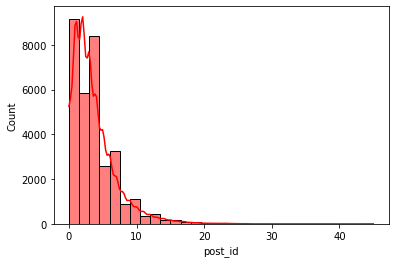

In [70]:
sns.histplot(users_by_likes[users_by_likes.exp_group == 'test'].post_id, bins=30, kde=True, color='red', alpha=0.5)

<AxesSubplot:xlabel='post_id', ylabel='Count'>

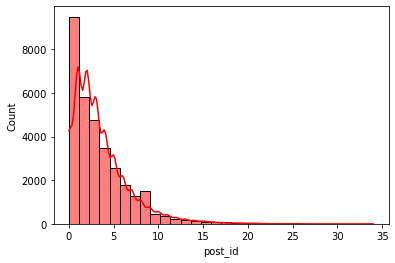

In [62]:
sns.histplot(users_by_likes[users_by_likes.exp_group == 'control'].post_id, bins=30, kde=True, color='red', alpha=0.5)

In [71]:
users_by_likes

,exp_group,post_id
user_id,,
200,test,1.0
201,test,3.0
202,test,2.0
212,test,4.0
213,test,7.0
...,...,...
168538,test,5.0
168541,control,2.0
168544,test,0.0


In [95]:
from statsmodels.stats.proportion import proportions_ztest

N_pos_1 = users_by_likes[(users_by_likes.post_id > 0) & (users_by_likes.exp_group == 'control')].shape[0] 
print(N_pos_1)
N_1 = users_by_likes[users_by_likes.exp_group == 'control'].shape[0]
print(N_1)
N_pos_2 = users_by_likes[(users_by_likes.post_id > 0) & (users_by_likes.exp_group == 'test')].shape[0] 
print(N_pos_2)
N_2 = users_by_likes[users_by_likes.exp_group == 'test'].shape[0]
print(N_2)

proportions_ztest(count=[N_pos_1, N_pos_2], nobs=[N_1, N_2], alternative="smaller")

28834
32350
29333
32659


(-2.8440248969682322, 0.0022273783427432096)

In [98]:
from scipy.stats import mannwhitneyu

mannwhitneyu(x=users_by_likes[users_by_likes.exp_group == 'control'].post_id,y=users_by_likes[users_by_likes.exp_group == 'test'].post_id, alternative='less')

MannwhitneyuResult(statistic=518358073.0, pvalue=1.4792531396220982e-05)